# Description

Generates a plot with the top traits and traits categories for LV603 (a neutrophil-termed latent variable in MultiPLIER).

# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import conf

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None
), "The manuscript directory was not configured"

display(conf.MANUSCRIPT["BASE_DIR"])

'/home/miltondp/projects/labs/greenelab/phenoplier_manuscript'

# Settings

In [4]:
LV_NUMBER_SELECTED = 603
LV_NAME_SELECTED = f"LV{LV_NUMBER_SELECTED}"
display(LV_NAME_SELECTED)

'LV603'

In [5]:
OUTPUT_FIGURES_DIR = Path(conf.MANUSCRIPT["FIGURES_DIR"], "entire_process").resolve()
display(OUTPUT_FIGURES_DIR)
OUTPUT_FIGURES_DIR.mkdir(parents=True, exist_ok=True)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier_manuscript/content/images/entire_process')

# Load data

In [6]:
input_filepath = Path(
    conf.RESULTS["PROJECTIONS_DIR"],
    "projection-smultixcan-mashr-zscores.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/bases_data/base_orig/results/projections/projection-smultixcan-mashr-zscores.pkl')

In [7]:
data = pd.read_pickle(input_filepath)

In [8]:
data.shape

(987, 4091)

In [9]:
data.head()

,20096_1-Size_of_red_wine_glass_drunk_small_125ml,2345-Ever_had_bowel_cancer_screening,N49-Diagnoses_main_ICD10_N49_Inflammatory_disorders_of_male_genital_organs_not_elsewhere_classified,100011_raw-Iron,5221-Index_of_best_refractometry_result_right,20003_1141150624-Treatmentmedication_code_zomig_25mg_tablet,S69-Diagnoses_main_ICD10_S69_Other_and_unspecified_injuries_of_wrist_and_hand,20024_1136-Job_code_deduced_Information_and_communication_technology_managers,20002_1385-Noncancer_illness_code_selfreported_allergy_or_anaphylactic_reaction_to_food,G6_SLEEPAPNO-Sleep_apnoea,...,Astle_et_al_2016_Sum_basophil_neutrophil_counts,RA_OKADA_TRANS_ETHNIC,pgc.scz2,PGC_ADHD_EUR_2017,MAGIC_FastingGlucose,Astle_et_al_2016_Red_blood_cell_count,SSGAC_Depressive_Symptoms,BCAC_ER_positive_BreastCancer_EUR,IBD.EUR.Inflammatory_Bowel_Disease,Astle_et_al_2016_High_light_scatter_reticulocyte_count
LV1,-0.024664,0.003688,0.012567,-0.034461,0.001201,0.014148,0.018256,0.009653,-0.017093,-0.038837,...,0.011403,0.085828,0.015572,-0.039664,-0.038479,0.122577,-0.035139,-0.010445,0.015023,0.023792
LV2,-0.004303,-0.029420,0.047338,-0.001564,-0.013066,-0.035286,-0.013678,0.001428,0.092427,-0.042897,...,0.033499,-0.067020,-0.008134,-0.015048,-0.052663,0.024055,-0.061202,-0.013779,-0.009366,-0.046370
LV3,0.002202,0.052078,-0.008698,0.005033,0.044586,-0.007397,0.005083,-0.045337,0.007136,-0.038652,...,0.022085,-0.050647,0.065178,0.022492,-0.023660,-0.020603,-0.029406,-0.047673,0.008665,-0.052370
LV4,0.048475,-0.023470,0.070050,-0.005772,-0.052764,0.020418,-0.026541,-0.023476,-0.026052,0.027361,...,-0.070081,-0.029188,-0.004153,0.045888,0.021802,-0.119812,0.034198,0.073167,-0.027658,-0.074837
LV5,-0.024358,0.002851,-0.021616,0.005716,0.010952,0.035602,-0.025353,-0.027787,0.023824,-0.027492,...,-0.012073,-0.013087,-0.014427,0.022283,-0.045800,0.013840,-0.000855,-0.047186,0.070286,0.027677


# Show LV traits

In [10]:
from entity import Trait

In [11]:
# Show related traits
lv_traits = data.loc[LV_NAME_SELECTED].sort_values(ascending=False)
display(lv_traits.head(20))

30220_raw-Basophill_percentage                                               0.180186
Astle_et_al_2016_Myeloid_white_cell_count                                    0.167547
Astle_et_al_2016_Sum_neutrophil_eosinophil_counts                            0.157739
Astle_et_al_2016_Granulocyte_count                                           0.157532
Astle_et_al_2016_White_blood_cell_count                                      0.156942
Astle_et_al_2016_Sum_basophil_neutrophil_counts                              0.156620
30130_raw-Monocyte_count                                                     0.156611
Astle_et_al_2016_Neutrophil_count                                            0.156235
Astle_et_al_2016_Monocyte_count                                              0.153750
30000_raw-White_blood_cell_leukocyte_count                                   0.144433
30160-Basophill_count                                                        0.122335
30180_raw-Lymphocyte_percentage                       

# Remove repeated traits

Here I remove traits that represent the same phenotype. I remove the least significant trait from duplicates.

In [12]:
lv_traits_to_remove = [
    "Astle_et_al_2016_White_blood_cell_count",
    "Astle_et_al_2016_Monocyte_count",
    "Astle_et_al_2016_Neutrophil_count",
]

In [13]:
_old_len = lv_traits.shape[0]
lv_traits = lv_traits.drop(lv_traits_to_remove)
assert lv_traits.shape[0] == _old_len - len(lv_traits_to_remove)
display(lv_traits.shape)

(4088,)

# Rename LV traits

In [14]:
lv_traits = lv_traits.reset_index().rename(columns={"index": "traits"})

In [15]:
lv_traits = lv_traits.replace(
    {
        "traits": {
            t: Trait.get_trait(full_code=t).description
            for t in lv_traits["traits"].values
        }
    }
)

In [16]:
lv_traits.head(10)

,traits,LV603
0,Basophill percentage,0.180186
1,Myeloid White Cell Count,0.167547
2,Sum Neutrophil Eosinophil Count,0.157739
3,Granulocyte Count,0.157532
4,Sum Basophil Neutrophil Count,0.156620
5,Monocyte count,0.156611
6,White blood cell (leukocyte) count,0.144433
7,Basophill count,0.122335
8,Lymphocyte percentage,0.119029
9,Neutrophill count,0.112022


In [17]:
lv_traits = lv_traits.replace(
    {
        "traits": {
            "Neutrophill count": "Neutrophill #",
            "Monocyte count": "Monocyte #",
            "Basophill #": "Basophill #",
            "White blood cell (leukocyte) count": "Leukocyte #",
            "Basophill percentage": "Basophill %",
            "Lymphocyte percentage": "Lymphocyte %",
            "Neutrophill percentage": "Neutrophill %",
            "Mean platelet (thrombocyte) volume": "Mean platelet volume",
            "Myeloid White Cell Count": "Myeloid white cell #",
            "Sum Neutrophil Eosinophil Count": "Neutrophil+Eosinophil #",
            "Granulocyte Count": "Granulocyte #",
            #     'Platelet crit': 'PCT',
            "Sum Basophil Neutrophil Count": "Basophil+Neutrophil #",
        }
    }
)

In [18]:
lv_traits.head(10)

,traits,LV603
0,Basophill %,0.180186
1,Myeloid white cell #,0.167547
2,Neutrophil+Eosinophil #,0.157739
3,Granulocyte #,0.157532
4,Basophil+Neutrophil #,0.156620
5,Monocyte #,0.156611
6,Leukocyte #,0.144433
7,Basophill count,0.122335
8,Lymphocyte %,0.119029
9,Neutrophill #,0.112022


# Plot

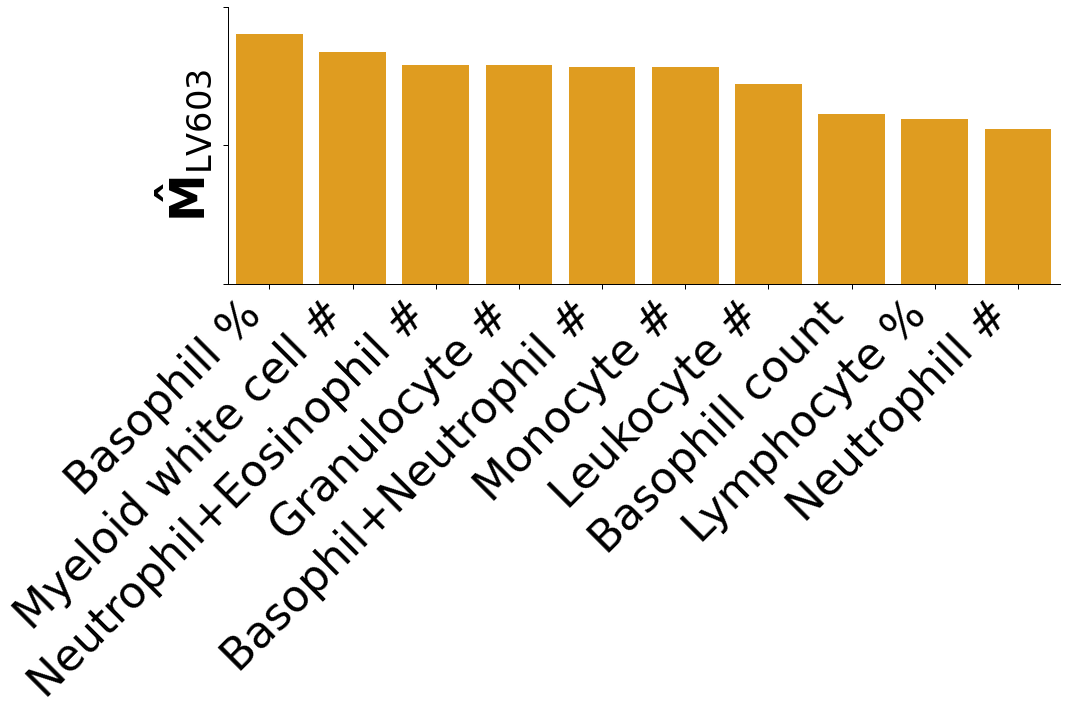

In [19]:
with sns.plotting_context("paper", font_scale=5.0):
    g = sns.catplot(
        data=lv_traits.rename(
            columns={
                "traits": "Traits",
            }
        ).head(10),
        x="Traits",
        y=LV_NAME_SELECTED,
        kind="bar",
        aspect=2.6,
        height=6,  # ci=None, height=6, aspect=1.6, legend_out=False,
        color="orange",
    )

    g.ax.set_ylabel(f"$\mathbf{{\hat{{M}}}}_{{\mathrm{{LV}}{LV_NUMBER_SELECTED}}}$")
    g.set_xticklabels(g.ax.get_xticklabels(), rotation=45, horizontalalignment="right")
    g.set_yticklabels([])
    g.ax.set_xlabel("")

    # save figure
    plt.savefig(Path(OUTPUT_FIGURES_DIR, "lv603_traits.pdf"), bbox_inches="tight")